Implementation of a paper that uses AlexNet to detect fire from images.

Link to paper : https://arxiv.org/pdf/1905.11922.pdf

# Importing Libraries

In [1]:
import numpy as np
import os
import cv2
import time
import skimage as sk
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Training Dataset

In [2]:
!git clone https://github.com/MIT-Robotics-Association/Computer-Vision-Sessions

Cloning into 'Computer-Vision-Sessions'...
remote: Enumerating objects: 3645, done.
remote: Counting objects: 100% (498/498), done.
remote: Compressing objects: 100% (488/488), done.
remote: Total 3645 (delta 19), reused 487 (delta 9), pack-reused 3147
Receiving objects: 100% (3645/3645), 543.47 MiB | 27.79 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (3917/3917), done.


In [3]:
data_dir= '/content/Computer-Vision-Sessions/data/CNN_dataset/Training'
img_size= 64
categories = ['Fire','NoFire']

In [4]:
def create_train_data():
    train_data=[]
    for cat in categories:
        path = os.path.join(data_dir,cat)
        class_num=categories.index(cat)
        for img in os.listdir(path):
            try:
                temp = cv2.imread(os.path.join(path,img))
                temp2 = cv2.resize(temp,(64,64))
                train_data.append([temp2, class_num])
            except Exception as e:
                pass
    return train_data

In [5]:
train_data = create_train_data()

In [6]:
import random
random.shuffle(train_data)

In [7]:
X=[]
Y=[]
for img, cat in train_data:
    X.append(img)
    Y.append(cat)

In [8]:
X=np.array(X).reshape(-1,64,64,3)
X = X/255.0
Y= np.array(Y)

# Model Definition

In [9]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfl

model = tf.keras.Sequential()

model.add(tfl.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(tfl.AveragePooling2D())
model.add(tfl.Dropout(0.5))

model.add(tfl.Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(tfl.AveragePooling2D())
model.add(tfl.Dropout(0.5))

model.add(tfl.Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(tfl.AveragePooling2D())
model.add(tfl.Dropout(0.5))

model.add(tfl.Flatten())
model.add(tfl.Dense(units=256,activation='relu'))
model.add(tfl.Dropout(0.5))
model.add(tfl.Dense(units=128, activation='relu'))
model.add(tfl.Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 average_pooling2d (Average  (None, 31, 31, 16)        0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 average_pooling2d_1 (Avera  (None, 14, 14, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

# Training of Model

In [11]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)

Epoch 1/100
53/53 [==============================] - 7s 18ms/step - loss: 0.6066 - accuracy: 0.6568 - val_loss: 0.5910 - val_accuracy: 0.6905
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 0.5279 - accuracy: 0.7482 - val_loss: 0.5503 - val_accuracy: 0.7387
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4943 - accuracy: 0.7653 - val_loss: 0.4994 - val_accuracy: 0.7593
Epoch 4/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4788 - accuracy: 0.7818 - val_loss: 0.4880 - val_accuracy: 0.7662
Epoch 5/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4588 - accuracy: 0.7812 - val_loss: 0.5486 - val_accuracy: 0.7001
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4471 - accuracy: 0.7966 - val_loss: 0.4482 - val_accuracy: 0.7950
Epoch 7/100
53/53 [==============================] - 0s 8ms/step - loss: 0.4484 - accuracy: 0.7913 - val_loss: 0.4636 - val_accuracy: 0.7620
Epoch 8/100


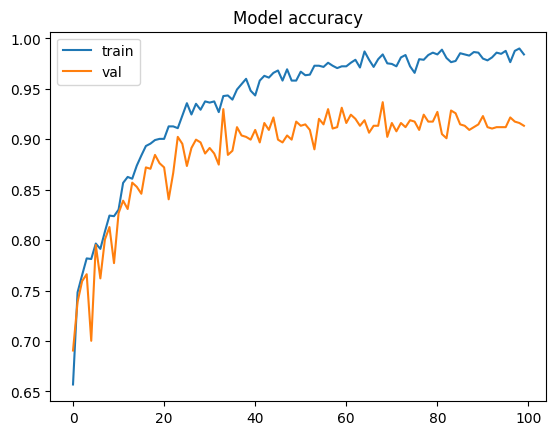

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(['train','val'])
plt.show()

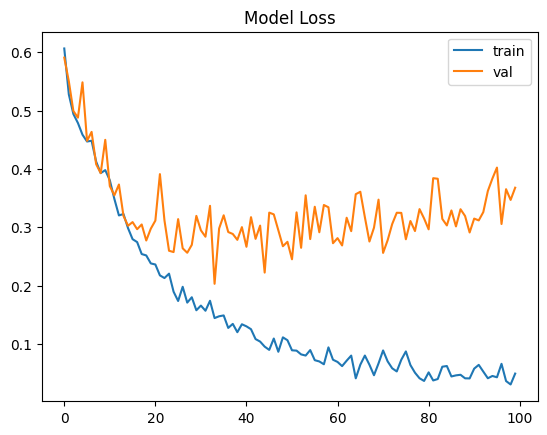

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['train','val'])
plt.show()

In [14]:
a= (history.history['val_accuracy'])
a=a[80:99]
sum(a)/len(a)

0.9151523897522374

In [15]:
model.save("/content/Computer-Vision-Sessions/data/CNN_dataset/basic_dropout.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing of Model

In [16]:
from tensorflow.keras.models import load_model
model = load_model('/content/Computer-Vision-Sessions/data/CNN_dataset/basic_dropout.h5')

In [17]:
def create_test(dir):
    x=[]
    for i in os.listdir(dir):
        try:
            path = os.path.join(dir,i)
            temp=cv2.imread(path)
            temp=cv2.resize(temp,(64,64))
            x.append(temp)
        except exception as e:
            pass
    return x

In [18]:
dir = '/content/Computer-Vision-Sessions/data/CNN_dataset/Testing/fire'
x_test=create_test(dir)
x_test=np.array(x_test).reshape(-1,64,64,3)
x_test = x_test/255.0

In [19]:
s=time.time()
y_pred = model.predict(x_test)
t=time.time()-s
y_pred_class=np.argmax(y_pred,axis=1)
n=np.count_nonzero(y_pred_class)
l=y_pred_class.shape[0]
p=l-n

3/3 [==============================] - 1s 149ms/step


In [20]:
print("True positives   : ",p)
print("False negatives  : ",n)
print("Accuracy         : ",(p/l*100),"%")
print("Computation time : ",(t*10**3)/l,"ms")
tp=p
fn=n

True positives   :  77
False negatives  :  11
Accuracy         :  87.5 %
Computation time :  7.966905832290649 ms


In [21]:
dir = '/content/Computer-Vision-Sessions/data/CNN_dataset/Testing/nofire'
x_test=create_test(dir)
x_test=np.array(x_test).reshape(-1,64,64,3)
x_test = x_test/255.0

In [22]:
s=time.time()
y_pred = model.predict(x_test)
t=time.time()-s
y_pred_class=np.argmax(y_pred,axis=1)
n=np.count_nonzero(y_pred_class)
l=y_pred_class.shape[0]
p=l-n

4/4 [==============================] - 0s 64ms/step


In [23]:
print("False positives  : ",p)
print("True negatives   : ",n)
print("Accuracy         : ",(n/l*100),"%")
print("Computation time : ",(t*10**3)/l,"ms")
fp=p
tn=n

False positives  :  0
True negatives   :  108
Accuracy         :  100.0 %
Computation time :  3.66288423538208 ms


In [24]:
table = [[" ","Predicted +ve","Predicted -ve"],['Actual +ve',tp,fn],["Actual -ve",fp,tn]]
print('Confusion matrix:')
print(tabulate(table, tablefmt='grid'))

Confusion matrix:
+------------+---------------+---------------+
|            | Predicted +ve | Predicted -ve |
+------------+---------------+---------------+
| Actual +ve | 77            | 11            |
+------------+---------------+---------------+
| Actual -ve | 0             | 108           |
+------------+---------------+---------------+


In [25]:
acc = (tp+tn)/(tp+fp+tn+fn)
re = tp/(tp+fn)
pre = tp/(tp+fp)
f= 2*re*pre/(re+pre)
table = [["Accuracy",acc*100],["Recall",re*100],["Precision",pre*100],["F1 score",f*100]]
print(tabulate(table, tablefmt='grid'))

+-----------+----------+
| Accuracy  |  94.3878 |
+-----------+----------+
| Recall    |  87.5    |
+-----------+----------+
| Precision | 100      |
+-----------+----------+
| F1 score  |  93.3333 |
+-----------+----------+


# Testing with single image

In [26]:
def test_model(dir):
    temp=cv2.imread(dir)
    sk.io.imshow(dir)
    x_test=cv2.resize(temp,(64,64))
    x_test=np.array(x_test).reshape(-1,64,64,3)
    x_test = x_test/255.0
    s=time.time()
    y_pred = model.predict(x_test)
    t=time.time()-s
    y_pred_class=np.argmax(y_pred,axis=1)
    if y_pred_class==0:
        print("Fire detected")
    else:
        print("No fire detected")
    print("Computation time : ",(t*10**3),"ms")

1/1 [==============================] - 0s 205ms/step
Fire detected
Computation time :  320.5859661102295 ms


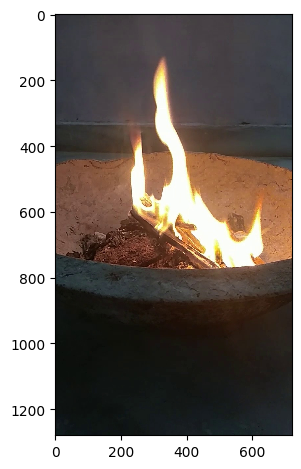

In [27]:
test_model('/content/Computer-Vision-Sessions/data/CNN_dataset/Testing/fire/firesamp28_frame525.jpg')

1/1 [==============================] - 0s 26ms/step
No fire detected
Computation time :  101.80187225341797 ms


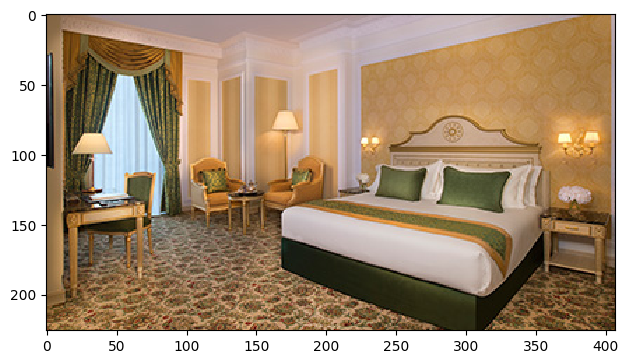

In [28]:
test_model(r"/content/Computer-Vision-Sessions/data/CNN_dataset/Testing/nofire/nofire224.jpg")